In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file = pd.read_csv("C:\\Users\\Megha\\Desktop\\DS Assignments\\decision trees\\Fraud_check.csv")

In [3]:
file

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
file['Target'] = file['Taxable.Income'].apply(lambda x: 'risky' if x<= 30000 else 'good')

In [5]:
 file

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [6]:
file.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
5,NO,Divorced,33329,116382,0,NO,good
6,NO,Divorced,83357,80890,8,YES,good
7,YES,Single,62774,131253,3,YES,good
8,NO,Single,83519,102481,12,YES,good
9,YES,Divorced,98152,155482,4,YES,good


In [7]:
file.drop('Taxable.Income' , axis = 1 , inplace = True)

In [8]:
file

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Target
0,NO,Single,50047,10,YES,good
1,YES,Divorced,134075,18,YES,good
2,NO,Married,160205,30,YES,good
3,YES,Single,193264,15,YES,good
4,NO,Married,27533,28,NO,good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,good
596,YES,Divorced,55369,2,YES,good
597,NO,Divorced,154058,0,YES,good
598,YES,Married,180083,17,NO,good


In [9]:
file.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Target'],
      dtype='object')

In [10]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Target           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [11]:
file.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [12]:
cat_cols = file[['Undergrad','Urban']]
cat_cols
cat_cols.apply(pd.Series.value_counts)

,Undergrad,Urban
YES,312,302
NO,288,298


In [13]:
file.Target.value_counts()

good     476
risky    124
Name: Target, dtype: int64

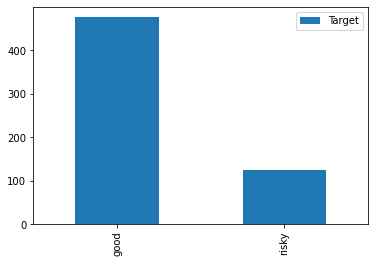

In [14]:
pd.DataFrame(file.Target.value_counts()).plot(kind='bar')
plt.show()

array([[<AxesSubplot:title={'center':'City.Population'}>,
        <AxesSubplot:title={'center':'Work.Experience'}>]], dtype=object)

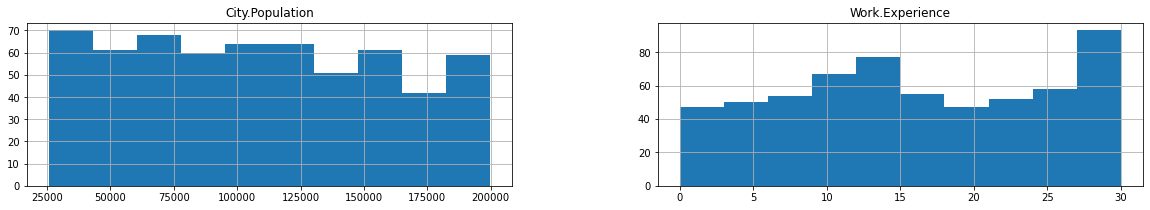

In [15]:
num_cols = file[['City.Population','Work.Experience']]
num_cols.hist(figsize = (20,3))

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

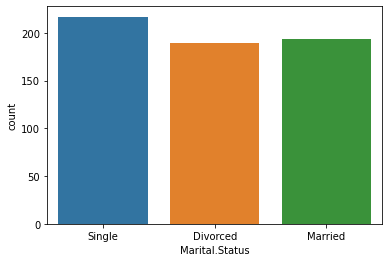

In [16]:
sns.countplot(file['Marital.Status'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Urban', ylabel='count'>

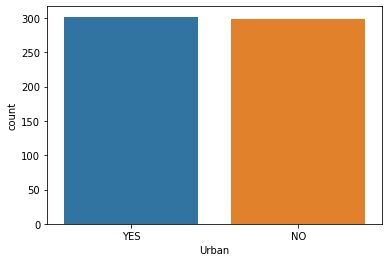

In [17]:
sns.countplot(file['Urban'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

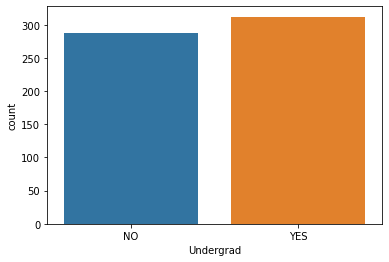

In [18]:
sns.countplot(file['Undergrad'])

In [19]:
file.dtypes

Undergrad          object
Marital.Status     object
City.Population     int64
Work.Experience     int64
Urban              object
Target             object
dtype: object

In [20]:
risky = file.Target=='risky'

In [21]:
no = file.Undergrad=='NO'

In [22]:
file[risky & no]

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Target
10,NO,Single,102602,19,YES,risky
12,NO,Divorced,148033,14,YES,risky
19,NO,Single,126953,30,YES,risky
38,NO,Single,177575,3,NO,risky
48,NO,Married,35480,12,NO,risky
68,NO,Single,139642,5,NO,risky
79,NO,Divorced,140885,7,YES,risky
94,NO,Single,122705,6,YES,risky
96,NO,Single,63622,17,NO,risky
110,NO,Single,32450,19,YES,risky


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
file['Undergrad']= le.fit_transform(file['Undergrad'])

In [26]:
file['Urban']= le.fit_transform(file['Urban'])

In [27]:
file['Target']= le.fit_transform(file['Target'])

In [28]:
file['Marital.Status']= le.fit_transform(file['Marital.Status'])

In [29]:
file

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Target
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


<AxesSubplot:>

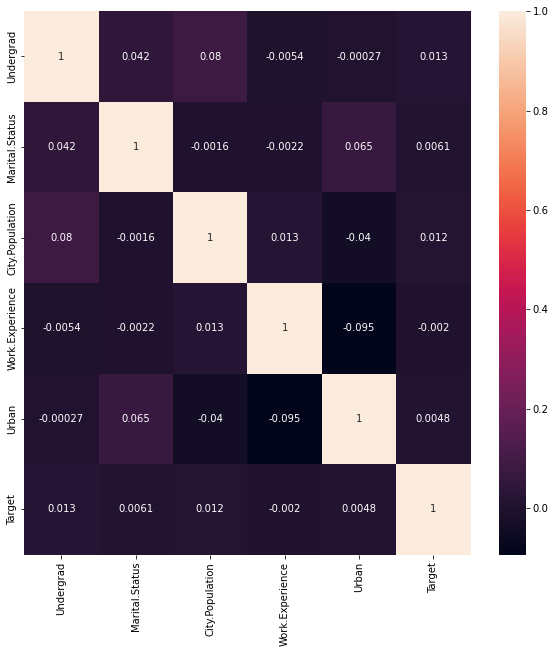

In [95]:
plt.figure(figsize = (10,10))
sns.heatmap(file.corr() , annot = True )

In [30]:
file['Target'].value_counts()

0    476
1    124
Name: Target, dtype: int64

In [31]:
x = file.iloc[:,0:5]

In [32]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [33]:
y = file.iloc[:,-1]

In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Target, Length: 600, dtype: int32

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
params = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'max_features' : np.arange(0,6)}

In [38]:
gcv = GridSearchCV(dtree, params, cv=5)

In [39]:
gcv

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': array([0, 1, 2, 3, 4, 5])})

In [40]:
import warnings
warnings.filterwarnings('ignore')

gcv.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': array([0, 1, 2, 3, 4, 5])})

In [41]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 2}

In [42]:
gcv.best_score_

0.7949999999999999

In [89]:
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3 , max_features = 2)

In [90]:
dtree

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=2)

In [91]:
dtree.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=2)

In [92]:
scores = cross_val_score(dtree, x, y, cv=15)

In [93]:
scores

array([0.8  , 0.8  , 0.8  , 0.775, 0.8  , 0.8  , 0.8  , 0.775, 0.8  ,
       0.8  , 0.8  , 0.775, 0.775, 0.775, 0.775])

In [94]:
scores.mean()

0.7900000000000001

In [49]:
from sklearn import tree

[Text(669.6, 665.91, 'X[3] <= 24.5\nentropy = 0.735\nsamples = 600\nvalue = [476, 124]'),
 Text(334.8, 475.65, 'X[4] <= 0.5\nentropy = 0.762\nsamples = 466\nvalue = [363, 103]'),
 Text(167.4, 285.39, 'X[3] <= 6.5\nentropy = 0.748\nsamples = 220\nvalue = [173, 47]'),
 Text(83.7, 95.13, 'entropy = 0.544\nsamples = 48\nvalue = [42, 6]'),
 Text(251.10000000000002, 95.13, 'entropy = 0.792\nsamples = 172\nvalue = [131, 41]'),
 Text(502.20000000000005, 285.39, 'X[1] <= 1.5\nentropy = 0.774\nsamples = 246\nvalue = [190, 56]'),
 Text(418.5, 95.13, 'entropy = 0.798\nsamples = 157\nvalue = [119, 38]'),
 Text(585.9, 95.13, 'entropy = 0.726\nsamples = 89\nvalue = [71, 18]'),
 Text(1004.4000000000001, 475.65, 'X[1] <= 0.5\nentropy = 0.626\nsamples = 134\nvalue = [113, 21]'),
 Text(837.0, 285.39, 'X[4] <= 0.5\nentropy = 0.552\nsamples = 39\nvalue = [34, 5]'),
 Text(753.3000000000001, 95.13, 'entropy = 0.544\nsamples = 24\nvalue = [21, 3]'),
 Text(920.7, 95.13, 'entropy = 0.567\nsamples = 15\nvalue = 

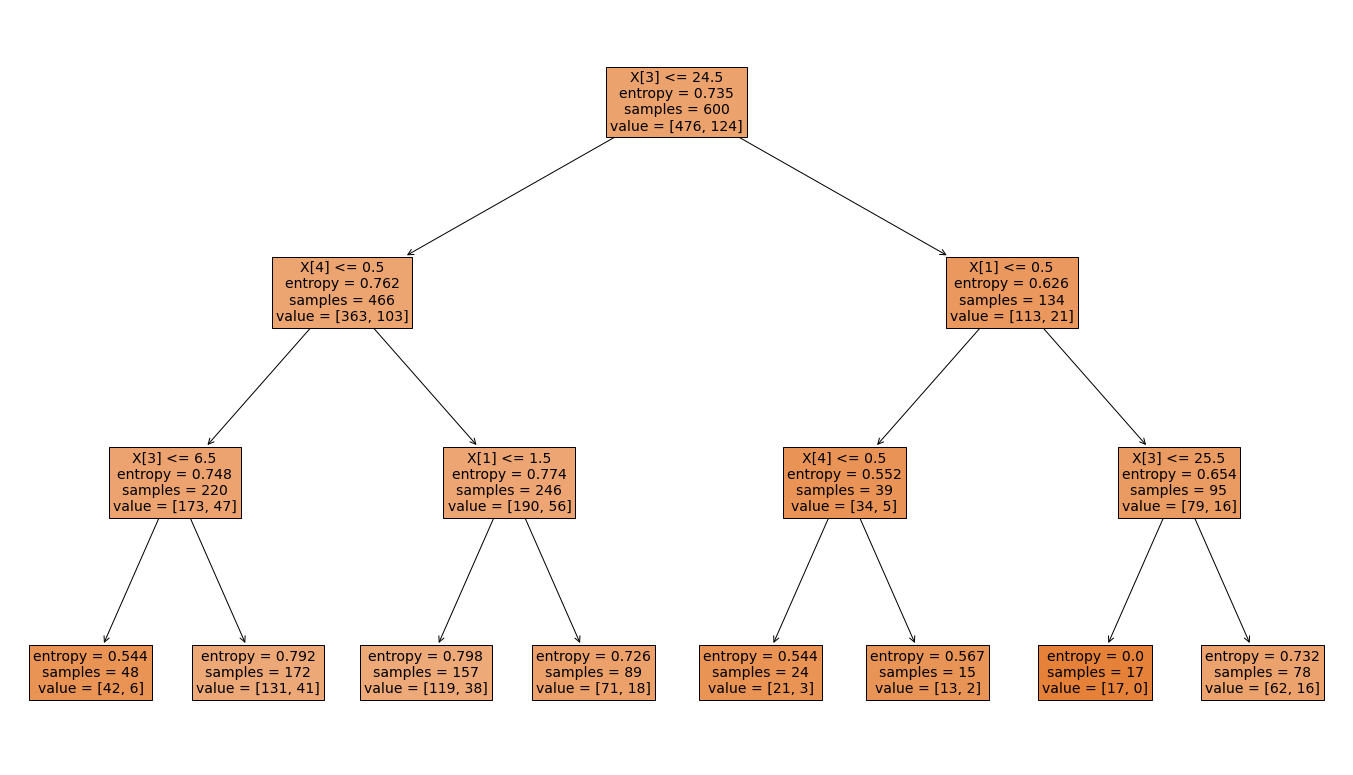

In [88]:
plt.figure(figsize=(24,14))
tree.plot_tree(dtree, filled=True, fontsize=14)

# The first split was based on work experience
# People who does not have an undergrad qualification is classified as 'Risky'